In [83]:
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import spacy
from spacy.cli.download import download

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
download(model="en_core_web_sm")

cuisine_df = pd.read_csv("C:/Prerna Tulsiani/COEP/Sem6/Data Science Project/cuisines1.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [84]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import itertools
import graphviz 
import json
import time
import gc
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from sklearn import model_selection
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import networkx as nx
import warnings
%matplotlib inline
init_notebook_mode(connected=True) 
warnings.filterwarnings("ignore")
notebookstart= time.time()

In [85]:
cuisine_df.head(10)

,Cuisine,Dish Name,Ingredients,Calories,Carbs,Fat,Protein
0,Amish and Mennonite,Baked Oatmeal,"rolled oats, brown sugar, ground cinnamon, bak...",393,59g,15g,7g
1,Amish and Mennonite,Amish White Bread,"warm water (110 degrees F/45 degrees C), white...",168,31g,3g,4g
2,Amish and Mennonite,Cheesy Amish Breakfast Casserole,"sliced bacon, diced, sweet onion, chopped, egg...",314,12g,23g,22g
3,Amish and Mennonite,Pennsylvania Dutch Pickled Beets and Eggs,"eggs, whole pickled beets, juice reserved, oni...",252,45g,5g,7g
4,Amish and Mennonite,Amish Macaroni Salad,"uncooked elbow macaroni, hard-cooked eggs, cho...",532,66g,25g,9g
5,Amish and Mennonite,Amish Friendship Bread Starter,"active dry yeast, warm water (110 degrees F/45...",34,8g,0g,1g
6,Amish and Mennonite,My Amish Friend's Caramel Corn,"plain popped popcorn, dry roasted peanuts (Opt...",238,22g,16g,3g
7,Amish and Mennonite,Pennsylvania Dutch Corn Pie,"potato, peeled and chopped, whole kernel corn,...",417,52g,21g,9g
8,Amish and Mennonite,Amish Peanut Butter,"light corn syrup, peanut butter, smooth, marsh...",74,12g,3g,1g
9,Amish and Mennonite,Amish Meatloaf,"ground beef, crushed butter-flavored crackers ...",464,46g,21g,24g


In [87]:
from nltk.stem import WordNetLemmatizer
import re
wnl = WordNetLemmatizer()

def remove_recipe_with_no_ingredients(data):
    data = data.dropna(subset=['Ingredients'])
    return data

def preprocess_data(data):
    
    # this function will make a string of ingredients out of the given list
    def process_ingredient_string(x):
        
        x = ", ".join([wnl.lemmatize(ing) for ing in x.split(", ")])
        return x
    
    def lemmatize(x):
        for word in re.findall(r"[a-z]+", x):
            x = x.replace(word, wnl.lemmatize(word, 'n') if 's' in word[-3:] else word)
        return x
        
    def removing_special_characters(x):
        
        # remove anything inside paranthesis
        x = re.sub(r"\([^\)]+\)", '', x)
        
        # remove anything containing a digit
        x = re.sub(r"\S*\d\S*", '', x)
        
        # make everything lowercase
        x = x.lower()
        
        # lemmatize all ingredients in the string
        x = lemmatize(x)
        
        # remove non-word characters except for , and -
        x = ' '.join(re.findall(r"[-,''\w]+", x))
                     
        # clean excess whitespace
        x = re.sub(r"\s+", ' ', x).strip()
        
        return x
    
    data['Ingredients'] = data['Ingredients'].apply(process_ingredient_string)
    data['Ingredients'] = data['Ingredients'].apply(removing_special_characters)
    
    return data

In [88]:
cuisine_df['Cuisine'].value_counts()

 Chinese                         192
 Cajun and Creole                156
 Canadian                        153
 Amish and Mennonite              63
 Australian and New Zealander     63
 Brazilian                        63
 Argentinian                      31
 Austrian                         23
 Chilean                          22
 Bangladeshi                      12
 Belgian                           7
Name: Cuisine, dtype: int64

In [89]:
# First removing rows where ingredients are not present
cuisine_df = remove_recipe_with_no_ingredients(cuisine_df)

# Preprocessing data
cuisine_df = preprocess_data(cuisine_df)

In [90]:
cuisine_df['Ingredients']

0      rolled oat, brown sugar, ground cinnamon, baki...
1      warm water , white sugar, active dry yeast, ve...
2      sliced bacon, diced, sweet onion, chopped, egg...
3      egg, whole pickled beet, juice reserved, onion...
4      uncooked elbow macaroni, hard-cooked egg, chop...
                             ...                        
780    skinless, boneless chicken breast meat - cut i...
781    dark brown sugar, cold water, fish sauce, rice...
782    vegetable oil, beef sirloin, cut into strip, f...
783    vegetable oil, finely chopped garlic, grated f...
784    beef top sirloin steak, soy sauce, white sugar...
Name: Ingredients, Length: 771, dtype: object

Text(0.5, 1.0, 'Top 50 Ingredients')

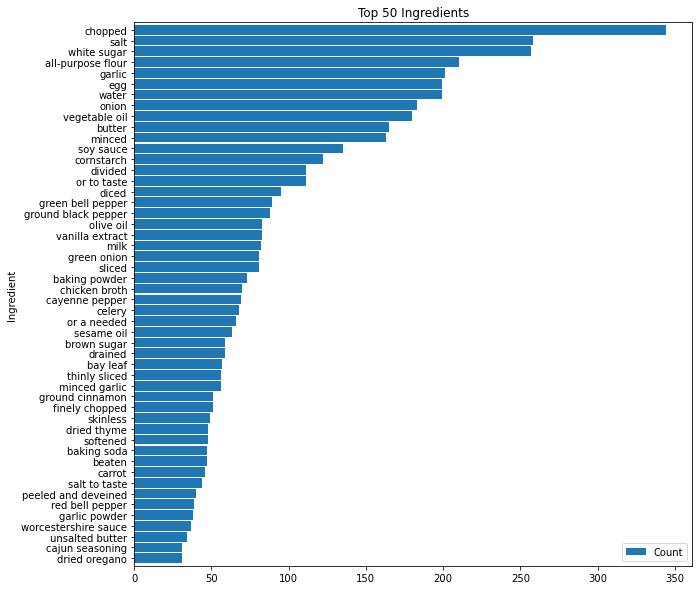

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(', ')], lowercase=False)
counts = vec.fit_transform(cuisine_df['Ingredients']) 
count=dict(zip(vec.get_feature_names(), counts.sum(axis=0).tolist()[0]))
count=pd.DataFrame(list(count.items()),columns=['Ingredient','Count'])
count.set_index('Ingredient').sort_values('Count',ascending=False)[:50].plot.barh(width=0.9)
plt.gcf().set_size_inches(10,10)
plt.gca().invert_yaxis()
plt.title('Top 50 Ingredients')

# from here we will remove chopped, all-purpose, divided, or to taste, sliced, or a needed, finely chopped

In [110]:
# removing unnecessary verbs and words from the ingredients
# using POS(Part of Speech) tagging to remove non-ingredient words from a list of ingredients using NLTK library

cuisine_list = cuisine_df['Cuisine']
ingredient_list = cuisine_df['Ingredients']

# set of stop words to filter out
stop_words = set(stopwords.words('english'))

# not-needed terms
not_needed = ['chopped', 'all-purpose', 'divided', 'or', 'to', 'taste', 'sliced', 'a', 'needed', 'finely', 'chopped']

# define a set of POS tags to keep
keep_tags = set(['NN', 'NNS', 'NNP', 'NNPS'])

cleaned_ingredients = []

for iterator in range(len(cuisine_df.index)):
    if(iterator in cuisine_df.index):
        ingredients = ingredient_list[iterator]
        cleaned_tokens = []
        for ing in ingredients.split(", "):
            individual_cleaned_token = []
            for i in ing.split():
                tokens = word_tokenize(i.lower())
                tagged_tokens = nltk.pos_tag(tokens)
                for token, tag in tagged_tokens:
                    if tag in keep_tags and token not in stop_words and token not in not_needed:
                        individual_cleaned_token.append(token)
            if(individual_cleaned_token):
                cleaned_tokens.append(" ".join(individual_cleaned_token))
        new_ing_list = ", ".join(cleaned_tokens)
        cuisine_df.loc[iterator, 'Ingredients'] = new_ing_list
        
#cuisine_df.to_csv('my_data.csv', index=False)

In [111]:
cuisine_df.head(10)

,Cuisine,Dish Name,Ingredients,Calories,Carbs,Fat,Protein
0,Amish and Mennonite,Baked Oatmeal,"oat, brown sugar, ground cinnamon, baking powd...",393,59g,15g,7g
1,Amish and Mennonite,Amish White Bread,"warm water, sugar, dry yeast, vegetable oil, s...",168,31g,3g,4g
2,Amish and Mennonite,Cheesy Amish Breakfast Casserole,"bacon, sweet onion, egg, beaten, frozen hash b...",314,12g,23g,22g
3,Amish and Mennonite,Pennsylvania Dutch Pickled Beets and Eggs,"egg, beet, juice, onion, sugar, cider vinegar,...",252,45g,5g,7g
4,Amish and Mennonite,Amish Macaroni Salad,"elbow macaroni, egg, onion, celery, bell peppe...",532,66g,25g,9g
5,Amish and Mennonite,Amish Friendship Bread Starter,"dry yeast, warm water, flour, sugar, milk",34,8g,0g,1g
6,Amish and Mennonite,My Amish Friend's Caramel Corn,"plain popped popcorn, dry peanut, brown sugar,...",238,22g,16g,3g
7,Amish and Mennonite,Pennsylvania Dutch Corn Pie,"potato, kernel corn, cream-style corn, egg, sa...",417,52g,21g,9g
8,Amish and Mennonite,Amish Peanut Butter,"light corn syrup, peanut butter, smooth, marsh...",74,12g,3g,1g
9,Amish and Mennonite,Amish Meatloaf,"ground beef, cracker, onion, egg, ketchup, bro...",464,46g,21g,24g


In [112]:
# again pre-processing using Named Entity Recognition(NER)

# Loading the pre-trained NER model
"""ner = spacy.load('en_core_web_sm')

for iterator in range(len(cuisine_df.index)):
    if(iterator in cuisine_df.index):
        ingredients = ingredient_list[iterator]
        ner_cleaned_ing = []
        
        for ing in ingredients.split():
            
            # Apply the NER model to the list of ingredients
            doc = ner(ing)
        
            for ent in doc.ents:
                print(ent, ent.label_)
            
        # Extract the named entities
        entities = [ent.text for ent in doc.ents if ent.label_ == 'FOOD']
        
        print(entities)"""

"ner = spacy.load('en_core_web_sm')\n\nfor iterator in range(len(cuisine_df.index)):\n    if(iterator in cuisine_df.index):\n        ingredients = ingredient_list[iterator]\n        ner_cleaned_ing = []\n        \n        for ing in ingredients.split():\n            \n            # Apply the NER model to the list of ingredients\n            doc = ner(ing)\n        \n            for ent in doc.ents:\n                print(ent, ent.label_)\n            \n        # Extract the named entities\n        entities = [ent.text for ent in doc.ents if ent.label_ == 'FOOD']\n        \n        print(entities)"

In [113]:
# Most common ingredients in each cuisine

cuisine_dict = dict()

for iterator in range(len(cuisine_df.index)):
    if(iterator in cuisine_df.index):
        cuisine = cuisine_list[iterator]
        ingredients = ingredient_list[iterator]
        if(cuisine not in cuisine_dict):
            cuisine_dict[cuisine] = dict()
        for ing in ingredients.split():
            if ing not in cuisine_dict[cuisine]:
                cuisine_dict[cuisine][ing] = 1
            else:
                cuisine_dict[cuisine][ing] += 1
            
for i in cuisine_dict:
    print(i, cuisine_dict[i])
        

 Amish and Mennonite {'oat,': 2, 'brown': 16, 'sugar,': 57, 'ground': 24, 'cinnamon,': 8, 'baking': 33, 'powder,': 22, 'salt,': 37, 'egg,': 36, 'milk,': 22, 'butter,': 20, 'vanilla': 18, 'extract,': 15, 'cranberry': 1, 'warm': 6, 'water,': 16, 'dry': 8, 'yeast,': 4, 'vegetable': 15, 'oil,': 13, 'bread': 8, 'flour': 1, 'bacon,': 3, 'sweet': 3, 'onion,': 13, 'beaten,': 5, 'frozen': 2, 'hash': 1, 'potato,': 5, 'thawed,': 2, 'cheddar': 4, 'cheese,': 7, 'curd': 2, 'cottage': 3, 'cheese': 4, 'beet,': 1, 'juice,': 4, 'cider': 2, 'vinegar,': 9, 'clove,': 1, 'bay': 1, 'leaf,': 1, 'pepper': 4, 'elbow': 2, 'macaroni,': 2, 'celery,': 4, 'bell': 2, 'pepper,': 7, 'dill': 3, 'pickle': 2, 'relish,': 2, 'creamy': 1, 'salad,': 1, 'yellow': 5, 'mustard,': 8, 'celery': 5, 'seed,': 7, 'salt': 7, 'flour,': 40, 'milk': 7, 'plain': 1, 'popped': 1, 'popcorn,': 1, 'peanut,': 1, 'margarine,': 1, 'light': 3, 'corn': 3, 'syrup,': 3, 'soda': 2, 'kernel': 1, 'corn,': 2, 'cream-style': 1, 'crust': 6, 'ready-to-use': 

In [114]:
max_ing = 0
min_ing = 10000000
list_of_ing_len = []

for iterator in range(len(cuisine_df.index)):
    if(iterator in cuisine_df.index):
        temp_l = cuisine_df['Ingredients'][iterator].split(", ")
        list_of_ing_len.append(len(temp_l))
        if(len(temp_l) <= min_ing):
            min_ing = len(temp_l)
        if(len(temp_l) >= max_ing):
            max_ing = len(temp_l)
            
print(min_ing, max_ing)

2 30


Text(0.5, 1.0, 'Ingredients in a Dish Distribution')

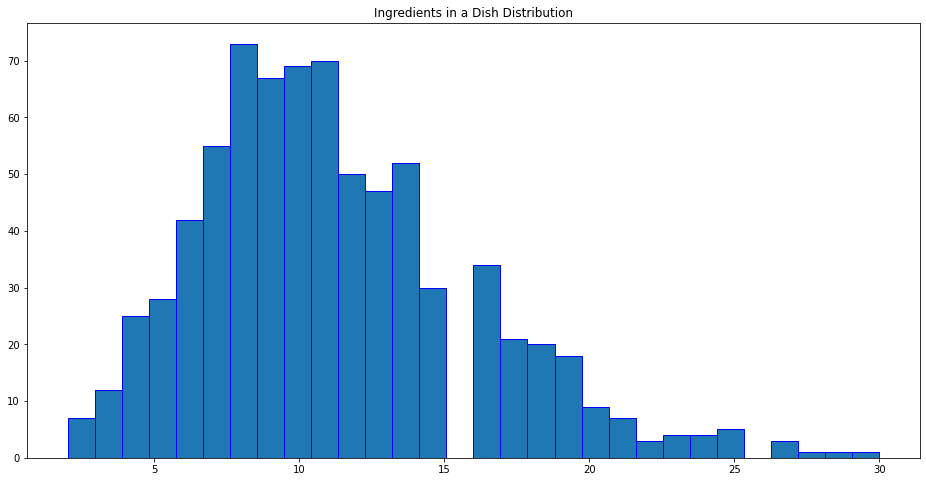

In [115]:
plt.hist(list_of_ing_len,bins = max_ing,edgecolor='b')
plt.gcf().set_size_inches(16,8)
plt.title('Ingredients in a Dish Distribution')

Text(0.5, 1.0, 'Cuisine Distribution')

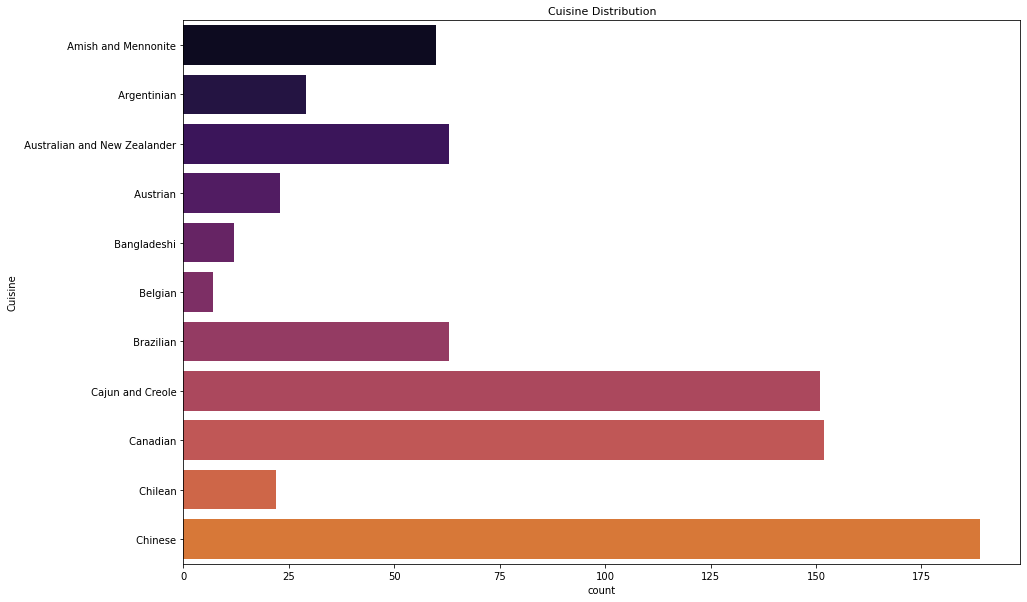

In [116]:
sns.countplot(y='Cuisine', data=cuisine_df,palette=sns.color_palette('inferno',15))
plt.gcf().set_size_inches(15,10)
plt.title('Cuisine Distribution',size=len(cuisine_df['Cuisine'].value_counts()))

Text(0.5, 1.0, 'Top 50 Ingredients')

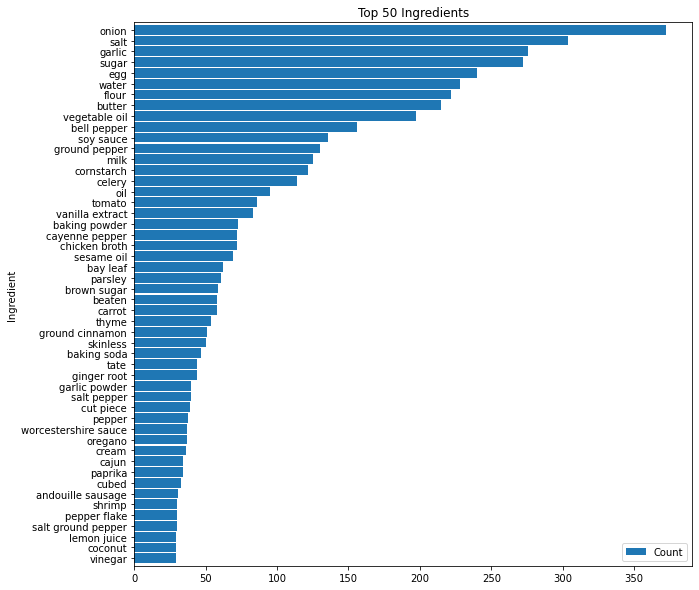

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(', ')], lowercase=False)
counts = vec.fit_transform(cuisine_df['Ingredients']) 
count=dict(zip(vec.get_feature_names(), counts.sum(axis=0).tolist()[0]))
count=pd.DataFrame(list(count.items()),columns=['Ingredient','Count'])
count.set_index('Ingredient').sort_values('Count',ascending=False)[:50].plot.barh(width=0.9)
plt.gcf().set_size_inches(10,10)
plt.gca().invert_yaxis()
plt.title('Top 50 Ingredients')

# from here we will remove chopped, all-purpose, divided, or to taste, sliced, or a needed, finely chopped

In [119]:
# Finding similar dishes

ingreList = []
for index, row in cuisine_df.iterrows():
    
    ingre = row['Ingredients']
    for i in ingre.split(", "):
        if i not in ingreList:
            ingreList.append(i)
            
print(ingreList)

['oat', 'brown sugar', 'ground cinnamon', 'baking powder', 'salt', 'egg', 'milk', 'butter', 'vanilla extract', 'cranberry', 'warm water', 'sugar', 'dry yeast', 'vegetable oil', 'bread flour', 'bacon', 'sweet onion', 'beaten', 'frozen hash brown potato', 'thawed', 'cheddar cheese', 'curd cottage cheese', 'cheese', 'beet', 'juice', 'onion', 'cider vinegar', 'clove', 'bay leaf', 'ground pepper', 'elbow macaroni', 'celery', 'bell pepper', 'dill pickle relish', 'creamy salad', 'yellow mustard', 'vinegar', 'celery seed', 'flour', 'plain popped popcorn', 'dry peanut', 'margarine', 'light corn syrup', 'baking soda', 'potato', 'kernel corn', 'cream-style corn', 'salt pepper', 'crust ready-to-use pie crust', 'peanut butter', 'smooth', 'marshmallow creme', 'ground beef', 'cracker', 'ketchup', 'potato skin', 'carrot', 'cornstarch', 'apple cider vinegar', 'mayonnaise salad', 'friendship bread starter', 'chicken broth', 'chicken bouillon granule', 'egg noodle', 'cabbage', 'mustard', 'cream tartar', 

In [120]:
def binary(ingre_list):
    
    binaryList = []
    
    for item in ingreList:
        if item in ingre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

cuisine_df['Bin Ingredients'] = cuisine_df['Ingredients'].apply(lambda x: binary(x))

In [133]:
from scipy import spatial

def Similarity(Id1, Id2):
    
    A = cuisine_df['Bin Ingredients'][Id1]
    B = cuisine_df['Bin Ingredients'][Id2]
    distance=spatial.distance.cosine(A,B)
    
    return distance, Id2

In [134]:
cuisine_df['Bin Ingredients']

0      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, ...
1      [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...
2      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3      [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
4      [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
                             ...                        
780    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...
781    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...
782    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
783    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...
784    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...
Name: Bin Ingredients, Length: 771, dtype: object

In [138]:
#Dishes similar to Dish No 1
food=[]
for i in cuisine_df.index:
    food.append(Similarity(1,i))
common_ingredients=sorted(food,key=lambda x: x[0])[1:10]
indexes = []
for i in range(len(common_ingredients)):
    indexes.append(common_ingredients[i][1])
cuisine_df.iloc[indexes]

,Cuisine,Dish Name,Ingredients,Calories,Carbs,Fat,Protein,Bin Ingredients
103,Australian and New Zealander,Dad's New Zealand Mince Stew,"vegetable oil, onion, ground beef, garlic, wat...",474,25g,32g,22g,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
112,Australian and New Zealander,Mango Chutney,"vinegar, sugar, brown sugar, ground cinnamon, ...",46,12g,0g,0g,"[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
133,Australian and New Zealander,Easy New Zealand Squares,"flour, coconut, date, sugar, baking powder, bu...",280,42g,13g,3g,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ..."
342,Cajun and Creole,Sweet Spicy Wings,"chicken, joint, tip, sauce, honey, butter, cay...",356,24g,23g,16g,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
20,Amish and Mennonite,Amish Bread,"bread flour, canola oil, dry yeat, sugar, salt...",58,4g,5g,0g,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, ..."
576,Chilean,Manjar (Dulce de Leche) from Scratch,"milk, sugar, vanilla extract, baking soda",85,15g,2g,2g,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, ..."
676,Chinese,Szechuan Edamame (Soy Beans),"frozen edamame pod, sesame seed, sugar, soy sa...",233,23g,10g,14g,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
78,Argentinian,Argentinian-Style Ribs,"beef rib, coarse salt, lime, cut wedge",0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
633,Chinese,Pork Chop Suey,"pork tenderloin, flour, vegetable oil, bok cho...",194,14g,8g,16g,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


In [139]:
# Top Bigrams By Cuisines
import nltk
from collections import Counter

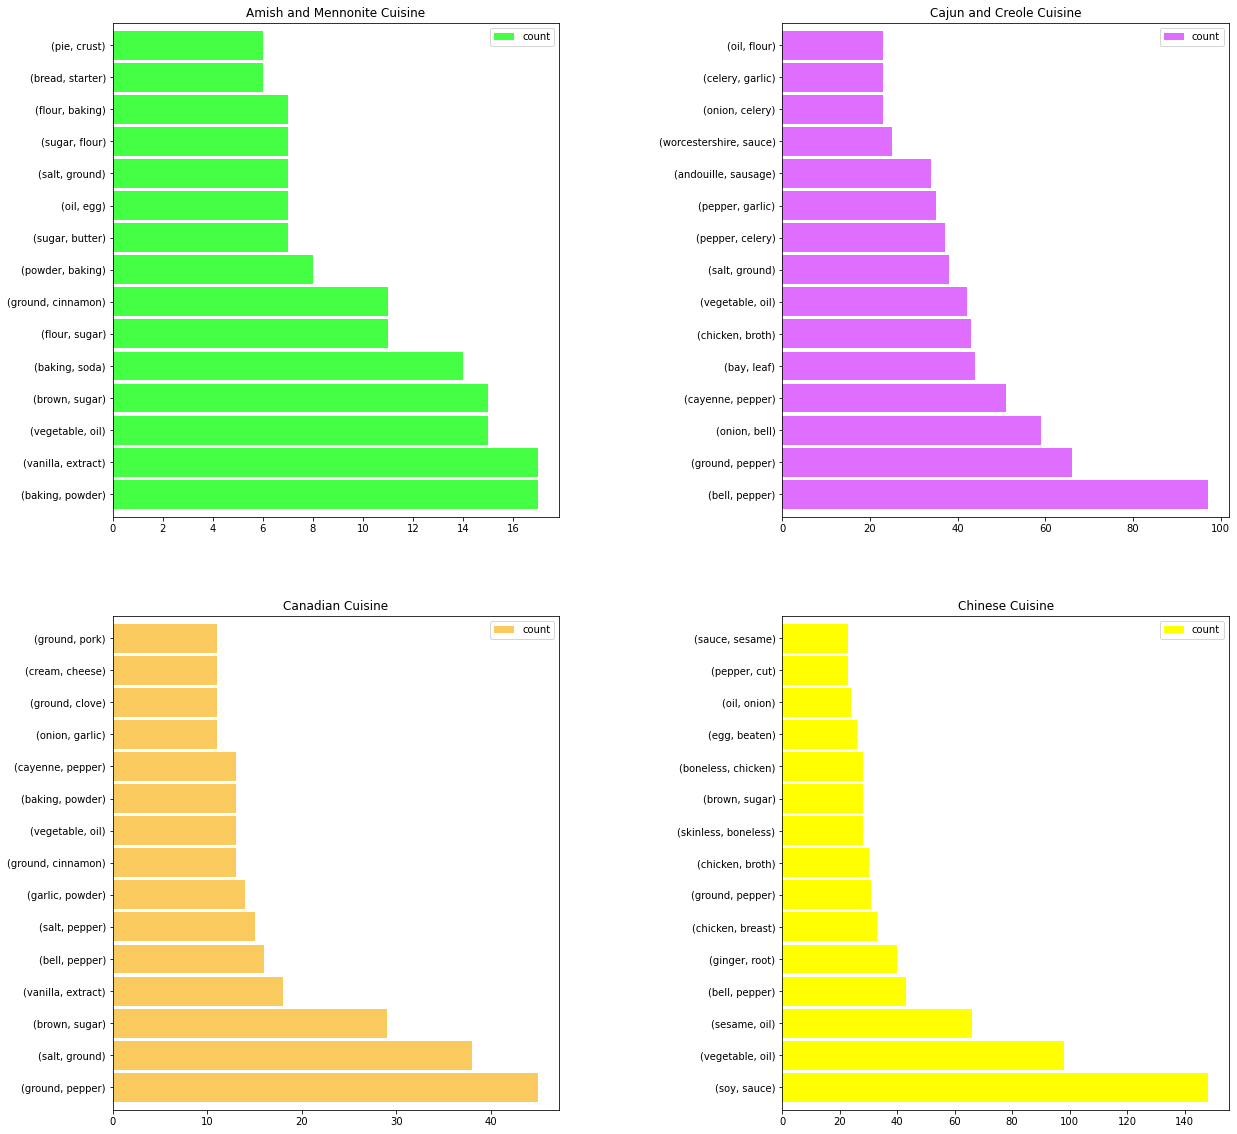

In [143]:
cuisine_df['for ngrams']=cuisine_df['Ingredients'].str.replace(', ',' ')
f,ax=plt.subplots(2,2,figsize=(20,20))

def ingre_cusine(cuisine):
    frame=cuisine_df[cuisine_df['Cuisine']==cuisine]
    common=list(nltk.bigrams(nltk.word_tokenize(" ".join(frame['for ngrams']))))
    return pd.DataFrame(Counter(common),index=['count']).T.sort_values('count',ascending=False)[:15]

ingre_cusine(' Amish and Mennonite').plot.barh(ax=ax[0,0],width=0.9,color='#45ff45')
ax[0,0].set_title('Amish and Mennonite Cuisine')

ingre_cusine(' Cajun and Creole').plot.barh(ax=ax[0,1],width=0.9,color='#df6dfd')
ax[0,1].set_title('Cajun and Creole Cuisine')

ingre_cusine(' Canadian').plot.barh(ax=ax[1,0],width=0.9,color='#fbca5f')
ax[1,0].set_title('Canadian Cuisine')

ingre_cusine(' Chinese').plot.barh(ax=ax[1,1],width=0.9,color='#ffff00')
ax[1,1].set_title('Chinese Cuisine')
plt.subplots_adjust(wspace=0.5)

In [168]:
cuisine_df['Ingredients']

0      oat, brown sugar, ground cinnamon, baking powd...
1      warm water, sugar, dry yeast, vegetable oil, s...
2      bacon, sweet onion, egg, beaten, frozen hash b...
3      egg, beet, juice, onion, sugar, cider vinegar,...
4      elbow macaroni, egg, onion, celery, bell peppe...
                             ...                        
780    skinless, boneless chicken breast meat - cut i...
781    dark brown sugar, cold water, fish sauce, rice...
782    vegetable oil, beef sirloin, cut into strip, f...
783    vegetable oil, finely chopped garlic, grated f...
784    beef top sirloin steak, soy sauce, white sugar...
Name: Ingredients, Length: 771, dtype: object

In [172]:
test_df = pd.read_csv("C:/Prerna Tulsiani/COEP/Sem6/Data Science Project/my_data.csv")
test_df['Ingredients']

0       oat, brown, sugar, ground, cinnamon, powder, s...
1                   water, sugar, yeast, oil, salt, flour
2       bacon, onion, chopped, egg, hash, brown, potat...
3       egg, beet, juice, onion, chopped, sugar, cider...
4       elbow, macaroni, egg, chopped, onion, chopped,...
                              ...                        
5431    white bread, half, chicken, egg, salt, black p...
5432    mayonnaise, egg, garlic clove, cream, salt, pi...
5433    flour, sugar, salt, margarine, cake yeast, egg...
5434          salt, flour, butter, vanilla, sugar, walnut
5435    egg white, cream tartar, white vinegar, superf...
Name: Ingredients, Length: 5436, dtype: object

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(binary=True).fit(cuisine_df['Ingredients'].values)
X_train_vectorized = vect.transform(cuisine_df['Ingredients'].values)
X_train_vectorized = X_train_vectorized.astype('float')

Result_transformed = vect.transform(test_df['Ingredients'].values)
Result_transformed = Result_transformed.astype('float')

In [174]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_transformed = encoder.fit_transform(cuisine_df.Cuisine)

In [176]:
# Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_transformed , random_state = 0)

from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(C=10,dual=False)
clf1.fit(X_train , y_train)
clf1.score(X_test, y_test)

0.694300518134715

In [177]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
vclf=VotingClassifier(estimators=[('clf1',LogisticRegression(C=10,dual=False)),('clf2',SVC(C=100,gamma=1,kernel='rbf',probability=True))],voting='soft',weights=[1,2])
vclf.fit(X_train , y_train)
vclf.score(X_test, y_test)

0.689119170984456

In [179]:
y_predicted = vclf.predict(Result_transformed)
y_predicted_final = encoder.inverse_transform(y_predicted)
predictions = pd.DataFrame({'cuisine' : y_predicted_final})
predictions = predictions[['cuisine']]
predictions.to_csv('submit.csv', index = False)